Installing Requried Packages

In [2]:
%pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [62]:
%pip install shap


   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/531.1 kB ? eta -:--:--
   ---------------------------------------- 531.1/531.1 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 1.9 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.7 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 1.9 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   --------------------------------

Importing the required libraries

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

Read the PIMA diabetes dataset 

In [6]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
Addressing Class Imbalance Using SMOTE

In [33]:
print(y.value_counts())

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
Splitting the dataset into training and testing sets

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Defining the XGBoost Classifier Model

In [46]:
model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=1.0
)

In [ ]:
Performing Cross-Validation to Evaluate Model Performance


In [50]:
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.77  0.72  0.8   0.87  0.795]
Mean CV Accuracy: 0.791


In [ ]:
Training the XGBoost Classifier Model

In [51]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Making Predictions and Evaluating the Model

In [52]:
y_pred=model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))   
print("Classification Report :",classification_report(y_test,y_pred))

Accuracy:  0.8376623376623377
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.82      0.87        99
           1       0.73      0.87      0.79        55

    accuracy                           0.84       154
   macro avg       0.82      0.85      0.83       154
weighted avg       0.85      0.84      0.84       154



Confusion Matrix

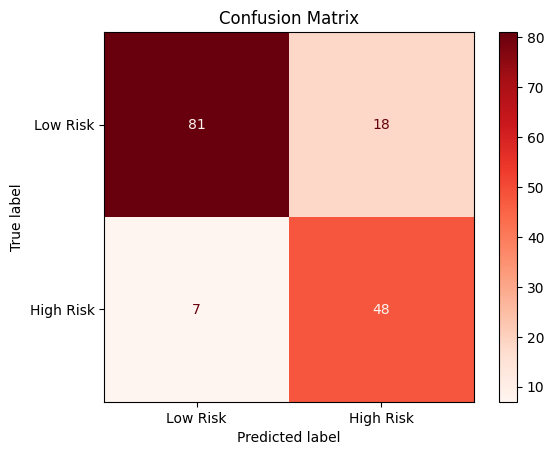

In [68]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk', 'High Risk'])
disp.plot(cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.show()

ROC Curve

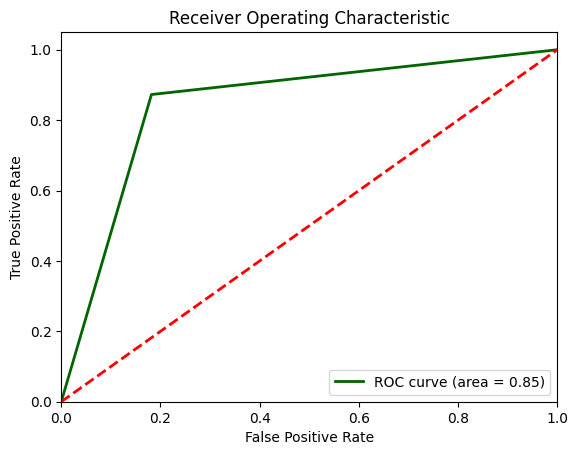

In [71]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
SHAP Summary Plot for Feature Importance

The SHAP (SHapley Additive exPlanations) summary plot provides insights into the feature importance and their impact on the model's predictions. Below is the code to generate the SHAP summary plot:


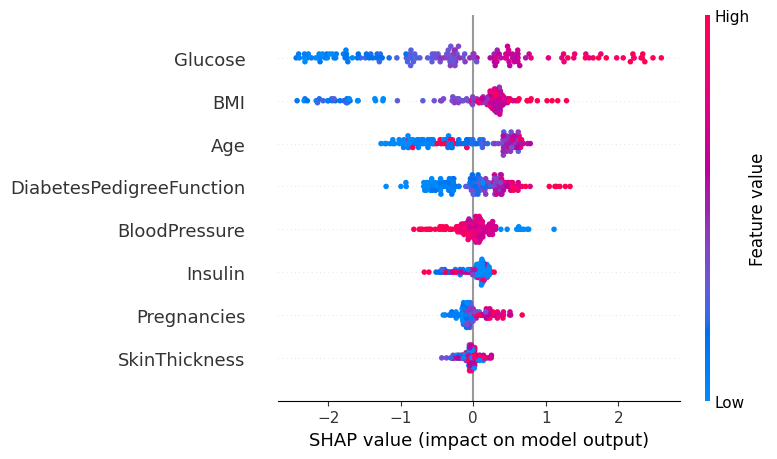

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(x_test)


shap.summary_plot(shap_values, x_test)